In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [2]:
crime_df = pd.read_csv("crimes_chicago.csv", parse_dates=['DATE  OF OCCURRENCE'])

In [3]:
crime_df['month'] = pd.DatetimeIndex(crime_df['DATE  OF OCCURRENCE']).month

In [4]:
crime_df['year'] = pd.DatetimeIndex(crime_df['DATE  OF OCCURRENCE']).year

In [5]:
crime_df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,month,year
0,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)",9,2021
1,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)",9,2021
2,JE369772,2021-01-19 00:00:00,020XX W SUMMERDALE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,N,N,2012,40.0,11,1161867.0,1935524.0,41.978751,-87.680099,"(41.978750958, -87.680098594)",1,2021
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)",9,2021
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)",8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204235,JE103677,2021-01-04 20:35:00,053XX W kinzie st,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,N,N,1523,37.0,11,NaN,NaN,NaN,NaN,NaN,1,2021
204236,JE103451,2021-01-04 20:54:00,036XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,N,N,1133,24.0,01A,1152321.0,1896125.0,41.870831,-87.716247,"(41.870831162, -87.716247283)",1,2021
204237,JD456174,2020-12-11 13:10:00,003XX S WABASH AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,Y,N,113,42.0,03,1176861.0,1898777.0,41.877589,-87.626073,"(41.87758897, -87.626072695)",12,2020
204238,JE108866,2021-01-04 17:45:00,124XX S STEWART AVE,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,N,N,523,34.0,06,NaN,NaN,NaN,NaN,NaN,1,2021


In [6]:
crime_df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,month,year
0,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)",9,2021
1,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)",9,2021
2,JE369772,2021-01-19 00:00:00,020XX W SUMMERDALE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,N,N,2012,40.0,11,1161867.0,1935524.0,41.978751,-87.680099,"(41.978750958, -87.680098594)",1,2021
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)",9,2021
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)",8,2021


In [7]:
crime_df.dropna(subset = ["LATITUDE", "LONGITUDE", "DATE  OF OCCURRENCE"], inplace=True)

In [8]:
crime_df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,month,year
0,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)",9,2021
1,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)",9,2021
2,JE369772,2021-01-19 00:00:00,020XX W SUMMERDALE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,N,N,2012,40.0,11,1161867.0,1935524.0,41.978751,-87.680099,"(41.978750958, -87.680098594)",1,2021
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)",9,2021
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)",8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204229,JD459190,2020-12-11 19:15:00,059XX W SCHOOL ST,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,N,N,1633,30.0,04A,1136267.0,1921332.0,41.940304,-87.774585,"(41.940303844, -87.774585171)",12,2020
204234,JE103492,2021-01-04 22:40:00,056XX S PRINCETON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,N,N,711,3.0,01A,1175251.0,1867477.0,41.791735,-87.632921,"(41.791735461, -87.632921214)",1,2021
204236,JE103451,2021-01-04 20:54:00,036XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,N,N,1133,24.0,01A,1152321.0,1896125.0,41.870831,-87.716247,"(41.870831162, -87.716247283)",1,2021
204237,JD456174,2020-12-11 13:10:00,003XX S WABASH AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,Y,N,113,42.0,03,1176861.0,1898777.0,41.877589,-87.626073,"(41.87758897, -87.626072695)",12,2020


In [9]:
len(crime_df[(crime_df.year==2020) & (crime_df.month == 1)])

0

In [10]:
len(crime_df[(crime_df.year==2021) & (crime_df.month == 12)])

4865

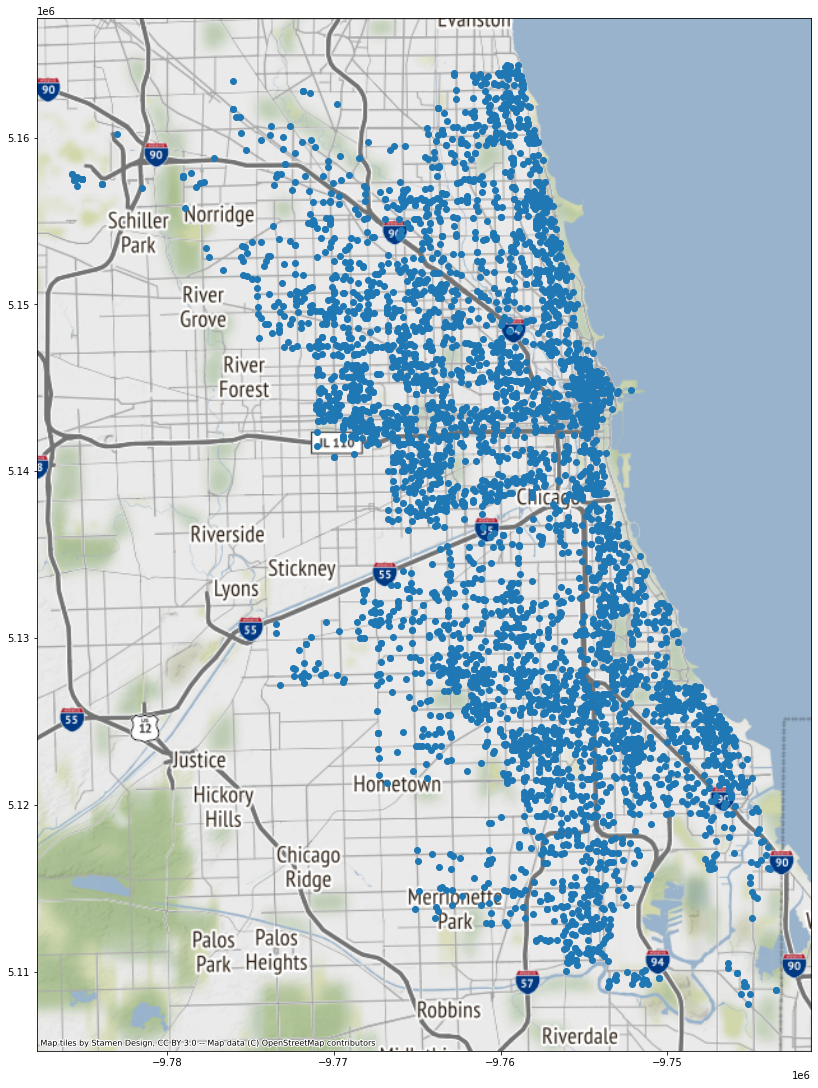

In [11]:
crime_df_2021_by_month = crime_df[(crime_df.year==2021) & (crime_df.month == 12)]

gdf_crimes = gpd.GeoDataFrame(crime_df_2021_by_month, geometry=gpd.points_from_xy(crime_df_2021_by_month['LONGITUDE'], crime_df_2021_by_month['LATITUDE']), crs='EPSG:4326') 
ax = gdf_crimes.to_crs('EPSG:3857').plot(figsize=(19, 19))
ctx.add_basemap(ax)

In [12]:
len(crime_df_2021_by_month)

4865

In [13]:
len(gdf_crimes)

4865

In [30]:
#crime_df_2021_by_month.to_csv("chicago_crimes_december_sanitized.csv", index=False)